## Setup

In [155]:
import os, sys, re, json, time, unittest, datetime, shutil
import itertools, collections
import random
from importlib import reload
from IPython.display import display, HTML

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import matthews_corrcoef

**Note:** The data below is only on the 10k datasets for now. This will be updated to leverage the full datasets. 

# Loading Data

In [2]:
users_df = pd.read_json("../dataset/user_10k.json", lines=True)


In [3]:
users_df.head()

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,...,cool,elite,fans,friends,funny,name,review_count,useful,user_id,yelping_since
0,4.67,0,0,0,0,0,0,0,0,1,...,0,[],0,"[cvVMmlU1ouS3I5fhutaryQ, nj6UZ8tdGo8YJ9lUMTVWN...",0,Johnny,8,0,oMy_rEb0UBEmMlu-zcxnoQ,2014-11-03
1,3.70,0,0,0,0,0,0,0,0,0,...,0,[],0,"[0njfJmB-7n84DlIgUByCNw, rFn3Xe3RqHxRSxWOU19Gp...",0,Chris,10,0,JJ-aSuM4pCFPdkfoZ34q0Q,2013-09-24
2,2.00,0,0,0,0,0,0,0,0,0,...,0,[],0,[],0,Tiffy,1,0,uUzsFQn_6cXDh6rPNGbIFA,2017-03-02
3,4.67,0,0,0,0,0,0,0,0,0,...,0,[],0,[],0,Mark,6,0,mBneaEEH5EMyxaVyqS-72A,2015-03-13
4,4.67,0,0,0,0,0,0,0,0,0,...,0,[],0,[],0,Evelyn,3,0,W5mJGs-dcDWRGEhAzUYtoA,2016-09-08


In [4]:
# All types of reviews - 10K dataset
# reviews_df = pd.read_json("../dataset/review_10k.json", lines=True)

# Just restaurant reviews - 10K dataset
reviews_df = pd.read_json("../dataset/restaurant_reviews_10k.json", lines=True)

# All types of reviews
# reviews_df = pd.read_json("../../../final_project/full_dataset/review.json", lines=True)

In [5]:
reviews_df.head()

,business_id,cool,date,funny,stars,text,useful,user_id
0,--6MefnULPED_I942VcFNA,0,2017-08-17,0,4,This is one of my top 3 places to get BBQ pork...,2,FEg8v92qx3kK4Hu4TF28Fg
1,--6MefnULPED_I942VcFNA,0,2017-05-31,0,3,This restaurant is famous for their BBQ dishes...,0,HPtjvIrhzAUkKsiVkeT4MA
2,--6MefnULPED_I942VcFNA,0,2016-10-23,0,2,Roasted pork is one of my favorite things... A...,1,MpvqV7lQcl15rflTBEUhXA
3,--6MefnULPED_I942VcFNA,0,2017-07-30,0,2,I walked by the restaurant more than 5 years a...,1,x-Gbs8sVid3yhJIoHD6Gfw
4,--6MefnULPED_I942VcFNA,0,2017-02-07,1,2,I came here to order a roast duck over rice to...,0,7Dykd1HolQx8mKPYhYDYSg


In [6]:
reviews_df.shape

(10000, 8)

In [7]:
reviews_df.describe()

,cool,funny,stars,useful
count,10000.000000,10000.000000,10000.00000,10000.000000
mean,0.535000,0.458000,3.76540,1.037900
std,1.866849,1.656958,1.31937,2.324307
min,0.000000,0.000000,1.00000,0.000000
25%,0.000000,0.000000,3.00000,0.000000
50%,0.000000,0.000000,4.00000,0.000000
75%,0.000000,0.000000,5.00000,1.000000
max,68.000000,52.000000,5.00000,72.000000


In [8]:
business_df = pd.read_json("../dataset/business_10k.json", lines=True)

In [9]:
business_df.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,"4855 E Warner Rd, Ste B9","{'AcceptsInsurance': True, 'ByAppointmentOnly'...",FYWN1wneV18bWNgQjJ2GNg,"[Dentists, General Dentistry, Health & Medical...",Ahwatukee,"{'Friday': '7:30-17:00', 'Tuesday': '7:30-17:0...",1,33.330690,-111.978599,Dental by Design,,85044,22,4.0,AZ
1,3101 Washington Rd,"{'BusinessParking': {'garage': False, 'street'...",He-G7vWjzVUysIKrfNbPUQ,"[Hair Stylists, Hair Salons, Men's Hair Salons...",McMurray,"{'Monday': '9:00-20:00', 'Tuesday': '9:00-20:0...",1,40.291685,-80.104900,Stephen Szabo Salon,,15317,11,3.0,PA
2,"6025 N 27th Ave, Ste 1",{},KQPW8lFf1y5BT2MxiSZ3QA,"[Departments of Motor Vehicles, Public Service...",Phoenix,{},1,33.524903,-112.115310,Western Motor Vehicle,,85017,18,1.5,AZ
3,"5000 Arizona Mills Cr, Ste 435","{'BusinessAcceptsCreditCards': True, 'Restaura...",8DShNS-LuFqpEWIp0HxijA,"[Sporting Goods, Shopping]",Tempe,"{'Monday': '10:00-21:00', 'Tuesday': '10:00-21...",0,33.383147,-111.964725,Sports Authority,,85282,9,3.0,AZ
4,581 Howe Ave,"{'Alcohol': 'full_bar', 'HasTV': True, 'NoiseL...",PfOCPjBrlQAnz__NXj9h_w,"[American (New), Nightlife, Bars, Sandwiches, ...",Cuyahoga Falls,"{'Monday': '11:00-1:00', 'Tuesday': '11:00-1:0...",1,41.119535,-81.475690,Brick House Tavern + Tap,,44221,116,3.5,OH


In [10]:
checkin_df = pd.read_json("../dataset/checkin_10k.json", lines=True)

In [11]:
checkin_df.head()

,business_id,time
0,7KPBkxAOEtb3QeIL9PEErg,"{'Thursday': {'21:00': 4, '1:00': 1, '4:00': 1..."
1,kREVIrSBbtqBhIYkTccQUg,"{'Monday': {'13:00': 1}, 'Thursday': {'20:00':..."
2,tJRDll5yqpZwehenzE2cSg,"{'Monday': {'12:00': 1, '1:00': 1}, 'Friday': ..."
3,r1p7RAMzCV_6NPF0dNoR3g,"{'Thursday': {'23:00': 1}, 'Saturday': {'21:00..."
4,mDdqgfrvROGAumcQdZ3HIg,"{'Monday': {'12:00': 1, '21:00': 1}, 'Wednesda..."


In [12]:
photos_df = pd.read_json("../dataset/photos_10k.json", lines=True)

In [13]:
photos_df.head()

,business_id,caption,label,photo_id
0,OnAzbTDn79W6CFZIriqLrA,,inside,soK1szeyan202jnsGhUDmA
1,OnAzbTDn79W6CFZIriqLrA,,inside,dU7AyRB_fHOZkflodEyN5A
2,OnAzbTDn79W6CFZIriqLrA,,outside,6T1qlbBdKkXA1cDNqMjg2g
3,OnAzbTDn79W6CFZIriqLrA,Bakery area,inside,lHhMNhCA7rAZmi-MMfF3ZA
4,XaeCGHZzsMwvFcHYq3q9sA,,food,oHSCeyoK9oLIGaCZq-wRJw


In [14]:
tip_df = pd.read_json("../dataset/tip_10k.json", lines=True)

In [15]:
tip_df.head()

,business_id,date,likes,text,user_id
0,tJRDll5yqpZwehenzE2cSg,2012-07-15,0,Get here early enough to have dinner.,zcTZk7OG8ovAmh_fenH21g
1,jH19V2I9fIslnNhDzPmdkA,2015-08-12,0,Great breakfast large portions and friendly wa...,ZcLKXikTHYOnYt5VYRO5sg
2,dAa0hB2yrnHzVmsCkN4YvQ,2014-06-20,0,Nice place. Great staff. A fixture in the tow...,oaYhjqBbh18ZhU0bpyzSuw
3,dAa0hB2yrnHzVmsCkN4YvQ,2016-10-12,0,Happy hour 5-7 Monday - Friday,ulQ8Nyj7jCUR8M83SUMoRQ
4,ESzO3Av0b1_TzKOiqzbQYQ,2017-01-28,0,"Parking is a premium, keep circling, you will ...",ulQ8Nyj7jCUR8M83SUMoRQ


# Baseline Model

In [16]:
n_features = 100000

text = reviews_df["text"]

print("Fitting Count Vectorizer")
# vectorizer = CountVectorizer(max_df=0.95, min_df=2,
#                                 max_features=n_features,
#                                 stop_words='english')
# word_vector = vectorizer.fit_transform(text)

# No setting of hyper-parameters
vectorizer = CountVectorizer()
word_vector = vectorizer.fit_transform(text)

print(np.shape(word_vector))

Fitting Count Vectorizer
(10000, 24872)


In [17]:
#Print example text, stars, and embeddings

print(reviews_df["text"][102])
print(reviews_df["stars"][102])
print(word_vector[102])

At ces trade show and looking for lunch. I show up at 2:03 and the host jokingly says we are closed. We laughed. But he meant it. Last year my burger ordered medium came out almost raw. I am never going back
1
  (0, 17650)	1
  (0, 3376)	1
  (0, 13684)	1
  (0, 12582)	1
  (0, 4549)	1
  (0, 19037)	1
  (0, 11962)	1
  (0, 22483)	1
  (0, 3953)	1
  (0, 10897)	1
  (0, 13729)	1
  (0, 24528)	1
  (0, 12)	1
  (0, 12556)	1
  (0, 13164)	1
  (0, 15363)	1
  (0, 13056)	1
  (0, 19747)	2
  (0, 1101)	1
  (0, 10472)	1
  (0, 1133)	1
  (0, 3582)	1
  (0, 15453)	1
  (0, 14751)	1
  (0, 2016)	1
  (0, 1762)	2
  (0, 9793)	1
  (0, 23190)	1
  (0, 23929)	2
  (0, 1555)	1
  (0, 1239)	2
  (0, 8885)	1
  (0, 3440)	1
  (0, 22022)	1
  (0, 11748)	1
  (0, 14510)	1


## NB Training and Scoring

In [18]:
# x_train_user_reviews = reviews_df["text"][0:6000]
# x_dev_user_reviews = reviews_df["text"][6001:8000]
# x_test_user_reviews = reviews_df["text"][8001:10000]


# x_train_user_reviews = word_vector[0:6000]
# x_dev_user_reviews = word_vector[6001:8000]
x_train_user_reviews = word_vector[0:8000]
x_test_user_reviews = word_vector[8001:10000]

# print("x_train_user_reviews", x_train_user_reviews)
# print("shape x_train_user_reviews", np.shape(x_train_user_reviews))



# y_train_user_stars = reviews_df["stars"][0:6000]
# y_dev_user_stars = reviews_df["stars"][6001:8000]
y_train_user_stars = reviews_df["stars"][0:8000]
y_test_user_stars = reviews_df["stars"][8001:10000]




train_file = x_train_user_reviews
label_file = y_train_user_stars
training_data = x_train_user_reviews






In [19]:
# -> 133             self.config.input_dim = self.training_data.shape[2]
#     134             self.config.step_size = self.training_data.shape[1]
#     135             self.config.label_dim = self.training_label.shape[1]

# # print(training_data.shape[2])
# print(training_data.shape[1])
# print(np.shape(training_data))
# print(len(training_data))
# print("hi")



In [20]:
nb = MultinomialNB()

nb.fit(x_train_user_reviews, y_train_user_stars)

y_pred = nb.predict(x_test_user_reviews)

acc = accuracy_score(y_pred, y_test_user_stars)
print("Accuracy on test set: {:.02%}".format(acc))
# pred_proba = nb.predict_proba(y_pred)
# log_loss_metric = log_loss(y_test_user_stars, pred_proba)
# print("Log-loss on test set: {:.02%}".format(log_loss_metric))

Accuracy on test set: 55.93%


In [21]:
# Print example prediction

print(y_pred[400])

4


## Create New Slices of Review JSON

In [22]:
# # reviews_path = "../../full_dataset/review.json"
# full_df = pd.read_json("../../full_dataset/review.json", lines=True)
# full_df.shape



In [23]:
# df_100k = full_df[0:100000]
# df_100k.to_json('../../full_dataset/df_100k.json', orient='records', lines=True)
# df_100k.shape

## RNN-LSTM

In [24]:
# !pip install --upgrade pip

# !pip install keras
# !pip install pandas_ml


In [25]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import pickle
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Embedding, Dropout, Dense, LSTM
from keras.callbacks import CSVLogger, History, ModelCheckpoint, EarlyStopping
from keras.models import model_from_json
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc, accuracy_score, precision_recall_fscore_support
from pandas_ml import ConfusionMatrix

from scipy import stats

%matplotlib inline

class YelpLSTM(object):
    def __init__(self, parms):
        self._parms = parms
#         self._tokenizer = Tokenizer(nb_words=self._parms['vocabulary_size'])
        self._tokenizer = Tokenizer(num_words=self._parms['vocabulary_size'])

        self._reviews = None
        self._balanced = None
        self._glove = None
        self._embedding_matrix = None
        self._model = None
        self._verbose = True
        self._predicted_classes = None
        self._predicted_proba = None
        self._eval_actual = None
        self._eval_predicted_proba = None
        self._eval_predicted_classes = None
        self._logs = None
        self._tpr = None
        self._fpr = None
        self._thresholds = None
        self._auc = None
        self._target_range = None
        
    def console(self, message):
        if self._verbose:
            print(message)
            
    def update_parms(self, parms):
        if parms['vocabulary_size'] != self._parms['vocabulary_size']:
            self._tokenizer = Tokenizer(nb_words=parms['vocabulary_size'])
        self._parms = parms

    def load_reviews(self, reviews_path):
        self.console('Loading reviews...')
        
        self._reviews = pd.read_json(reviews_path, lines=True)

        self.console('%d reviews loaded.' % len(self._reviews))
        
#     def load_glove(self, glove_folder):
    # Changing to only load single file
    def load_glove(self, gloveFile):
        self.console('Loading GloVe embeddings...')
        glove = {}
        count = 0
#         with open(os.path.join(glove_folder, 'glove.6B.' + str(self._parms['embedding_dim']) + 'd.txt'), 'r') as f:

        with open(gloveFile, 'r') as f:
            while True:
                line = f.readline()
                if not line:
                    break
                line = line.split(' ')
                word = line[0]
                vector = np.asarray(line[1:], dtype='float32')
                glove[word] = vector
        self._glove = glove
        self.console('%d embeddings loaded.' % len(self._glove))
        
    @property
    def training(self):
        return self._X_train, self._y_train
    
    @property
    def test(self):
        return self._X_test, self._y_test
    
    @property
    def best_model(self):
        return self._model
    
    @property
    def predicted_classes(self):
        return self._predicted_classes
    
    @property
    def predicted_proba(self):
        return self._predicted_proba
    
    @property
    def tokenizer(self):
        return self._tokenizer
    
    @property
    def logs(self):
        return self._logs
        
    @property
    def confusion_matrix(self):
        return self._cm
    
    @property
    def prfs(self):
        return self._prfs
    
    @property
    def prfs_weighted(self):
        return self._prfs_weighted
    
    @property
    def corr_coeff(self):
        return self._corr_coeff
    
    @property
    def fpr(self):
        return self._fpr
    
    @property
    def tpr(self):
        return self._tpr
    
    @property
    def thresholds(self):
        return self._thresholds
    
    @property
    def auc(self):
        return self._auc
    
    @property
    def eval_actual(self):
        return self._eval_actual
    
    @property
    def eval_predicted_classes(self):
        return self._eval_predicted_classes
            
    def _balance_dataset(self):
        categories = []
        samples = []
                
        self._target_range = range(2)
        
        if self._parms['target']['feature'] == 'stars':
            prefix = ''
            self._target_range = range(1,6)
            
        else:
            prefix = 'is_'
            self._reviews['is_' + self._parms['target']['feature']] = self._reviews[self._parms['target']['feature']].apply(lambda v: v > self._parms['target']['threshold']).astype(int)            
        for i in self._target_range:
            categories.append(self._reviews[self._reviews[prefix + self._parms['target']['feature']] == i])
        
        sizes = list(map(lambda s: len(s), categories))
        
        nb_samples = min(self._parms['samples'], np.min(sizes))
        self.console('Using %s samples per category' % str(nb_samples))
        
        for category in categories:
            samples.append(category.sample(n=nb_samples, random_state=32))
        self._balanced = pd.concat(samples)
       
    def _build_datasets(self):
        self._tokenizer.fit_on_texts(self._balanced.text.values)
        
        sequences = self._tokenizer.texts_to_sequences(self._balanced.text)
        padded_seq = pad_sequences(sequences, maxlen=self._parms['seq_size'])
        
        if self._parms['target']['feature'] == 'stars':
            target = to_categorical(self._balanced[self._parms['target']['feature']])
        else:
            target = self._balanced['is_' + self._parms['target']['feature']].values

        # Original
#         self._X_train, self._X_test, self._y_train, self._y_test = train_test_split(padded_seq, target, test_size=0.2, random_state=42)
        # Updates to randomization to replicate shared restaurant_reviews_final.JSON
        self._X_train, self._X_test, self._y_train, self._y_test = train_test_split(padded_seq, target, test_size=0.2, random_state=123)
            
    def _build_embeddings(self):
        tokenized_words = map(lambda t: t[0], sorted(self._tokenizer.word_index.items(), key=lambda t: t[1])[:self._parms['vocabulary_size']])

        embedding_matrix = np.zeros((self._parms['vocabulary_size'], self._parms['embedding_dim']))
        for idx, word in enumerate(tokenized_words):
            try:
                embedding_matrix[idx] = self._glove[word]
            except:
                pass
        self._embedding_matrix = embedding_matrix

    def _build_model(self):
        model = Sequential()

        model.add(Embedding(input_dim=self._parms['vocabulary_size'],
                            output_dim=self._parms['embedding_dim'],
                            input_length=self._parms['seq_size'],
                            weights=[self._embedding_matrix],
                            trainable=False))

        model.add(LSTM(self._parms['memory_neurons']))
        model.add(Dropout(0.2))

        activation = 'sigmoid'
        loss = 'binary_crossentropy'        
        
        outputs = 1
        
        if len(self._y_train.shape) > 1:
            activation = 'softmax'
            loss = 'categorical_crossentropy'
            outputs = self._y_train.shape[1]
            
        model.add(Dense(outputs, activation=activation))        
        
        model.compile(loss=loss, optimizer='nadam', metrics=['accuracy'])    
    
        self._model = model
        self.console(self._model.summary())

    def fit(self, model_name, folder='./', verbose=True):
        self._verbose = verbose
        
        assert self._reviews is not None, 'Reviews file was not loaded'
        assert len(self._reviews) > 0, 'Reviews file is empty'
        assert self._glove is not None, 'GloVe file was not loaded'
        assert len(self._glove) > 0, 'GloVe file is empty'
        
        self.console('Balancing dataset...')
        self._balance_dataset()
        self.console('Building training and test datasets...')
        self._build_datasets()
        self.console('Building word embeddings from GloVe...')
        self._build_embeddings()
        self.console('Building model...')
        self._build_model()
        self.console('Fitting model...')
        
        parms_desc = model_name + '_%ddim_%dvoc_%dseq' % (self._parms['embedding_dim'],
                                                          self._parms['vocabulary_size'],
                                                          self._parms['seq_size'])      
        
        hist = History()        
        
        logger = CSVLogger(os.path.join(folder, parms_desc) + '_training_logs.csv')     
        
        checks = ModelCheckpoint(os.path.join(folder, parms_desc) + '_model-{epoch:02d}_{val_acc:.2f}',
                                 monitor='val_acc',
                                 verbose=int(self._verbose),
                                 save_best_only=True,
                                 mode='max')
        early_stopping = EarlyStopping(monitor='val_acc', patience=2)
        
        self._model.fit(self._X_train
                        , self._y_train
#                        , nb_epoch=self._parms['nb_epochs']
                        , epochs=self._parms['epochs']
                        , batch_size=self._parms['batch_size']
                        , validation_data=(self._X_test, self._y_test)
                        , callbacks=[checks, hist, logger, early_stopping]
                        )
        
        self._logs = pd.read_csv(os.path.join(folder, parms_desc) + '_training_logs.csv')
        best_epoch = self._logs['val_acc'].argmax()
    
        best_val_acc = '{:.2f}'.format(self._logs['val_acc'].iloc[best_epoch])
        
        best_model = (os.path.join(folder, parms_desc) + '_model-%02d_%s') % (best_epoch + 1, best_val_acc)
        
        with open(os.path.join(folder, parms_desc + '_tokenizer'), 'wb') as tok:
            pickle.dump(self._tokenizer, tok)
        
        self.console('Calculating predictions for the best model...')
        self._model = load_model(best_model)       
        
        self._predicted_proba = self.predict_proba()
        if len(self._y_train.shape) > 1:
            self._predicted_classes = np.argmax(self._predicted_proba, axis=1)
            
        else:
            self._predicted_classes = (self._predicted_proba > 0.5).astype(int)
        
        self.console('Calculating metrics for the best model...')
        self.evaluate()
        self.console('Finished!')
        
        
        
        
        
        
        
        # serialize model to JSON
        model_json = self._model.to_json()
        with open("model.json", "w") as json_file:
            json_file.write(model_json)
        # serialize weights to HDF5
        self._model.save_weights("model.h5")
        print("Saved model to disk")
        
        
        
        
        
        
        return self._model

    def load(self, tokenizer, model):
        error_msg = ''
        try:
            self._model = load_model(model)
        except:
            error_msg = 'Error loading model!'
            
        try:
            with open(tokenizer, 'rb') as tok:
                self._tokenizer = pickle.load(tok)
        except:
            error_msg = 'Error loading tokenizer!'
            
        return (error_msg == ''), error_msg
    
    def make_prediction(self, sentence):
        sequence = self._tokenizer.texts_to_sequences([sentence])
        padded_seq = pad_sequences(sequence, maxlen=self._parms['seq_size'])
        return self.predict_classes(padded_seq)[0]
    
    def predict_classes(self, X=None, threshold=0.5):
        if len(self._y_train.shape) > 1:
            predictions = np.argmax(self.predict_proba(X), axis=1)
        else:
            predictions = (self.predict_proba(X) > threshold).astype(int)
            
        return predictions
        
    def predict_proba(self, X=None):
        if X is None:
            X = self._X_test
        predictions = self._model.predict_proba(X)
        return predictions
    
    def evaluate(self, actual=None, predicted_proba=None, threshold=0.5):
        if actual is None:
            eval_actual = self._y_test[:]
        else:
            eval_actual = actual[:]
            
        if predicted_proba is None:
            eval_predicted_proba = self._predicted_proba[:]
        else:
            eval_predicted_proba = predicted_proba[:]
            
        if len(eval_actual.shape) == 1:
            binary = True
            eval_predicted_classes = (eval_predicted_proba > threshold).astype(int).ravel()
            eval_predicted_proba = eval_predicted_proba.ravel()
        else:
            binary = False
            eval_predicted_classes = eval_predicted_proba.argmax(axis=1)
            eval_actual = eval_actual.argmax(axis=1)
        
        self._eval_actual = eval_actual
        self._eval_predicted_proba = eval_predicted_proba
        self._eval_predicted_classes = eval_predicted_classes
    
        self._cm = ConfusionMatrix(self._eval_actual, self._eval_predicted_classes)
        
        prfs = precision_recall_fscore_support(y_true=self._eval_actual, y_pred=self._eval_predicted_classes)
        prfs = pd.DataFrame.from_dict(dict(zip(['precision', 'recall', 'fscore', 'support'], prfs)))
        prfs_weighted = precision_recall_fscore_support(y_true=self._eval_actual, y_pred=self._eval_predicted_classes, average = 'weighted')
        prfs_weighted = pd.DataFrame.from_dict(dict(zip(['precision', 'recall', 'fscore', 'support'], prfs_weighted)))
        corr_coeff = matthews_corrcoef(y_true=self._eval_actual, y_pred=self._eval_predicted_classes)                
        
#         prfs.set_index([self._target_range], inplace=True)
        
        self._prfs = prfs
        self._prfs_weighted = prfs_weighted
        self._corr_coeff = corr_coeff
        
        if binary:
            self._fpr, self._tpr, self._thresholds = roc_curve(self._eval_actual, self._eval_predicted_proba)
            self._auc = auc(self._fpr, self._tpr)
        else:
            self._fpr, self._tpr, self._thresholds, self._auc = None, None, None, None

Using TensorFlow backend.


In [26]:
parms = {
#          'embedding_dim': 100,
         'embedding_dim': 300,
        
         'vocabulary_size': 10000,
#          'vocabulary_size': 100000,
         'seq_size': 400,

#          'epochs': 30,         
#          'epochs': 2,
         'epochs': 1,
         
         'batch_size': 128,
         'memory_neurons': 100,
         'target': {
             'feature': 'stars'
             , 'threshold': None
             },
#          'samples': 62500
         'samples': 1000000
         }

lstm = YelpLSTM(parms)

In [27]:
start_time = datetime.datetime.now()
print("Start time: ", start_time)

# reviews_path = "../dataset/review_10k.json"

# reviews_path = "../dataset/restaurant_reviews_10k.json"

# reviews_path = "../../full_dataset/review.json"

# reviews_path = "../../full_dataset/df_100k.json"

# reviews_path = "../../full_dataset/restaurant_reviews.json"

reviews_path = "../../full_dataset/restaurant_reviews_final.json"

lstm.load_reviews(reviews_path)

end_time = datetime.datetime.now()
print("End time: ", end_time)

time_taken = end_time - start_time
print("Time taken: ", time_taken)

Start time:  2018-08-07 07:03:28.534522
Loading reviews...
1873619 reviews loaded.
End time:  2018-08-07 07:03:59.889724
Time taken:  0:00:31.355202


In [28]:
# Small GloVe file
# gloveFile = "../../glove/glove.6B.100d.txt"

# Primary GloVe file
gloveFile = "../../glove/glove.6B.300d.txt"

# Large GloVe file
# gloveFile = "../../glove/glove.42B.300d.txt"

start_time = datetime.datetime.now()
print("Start time: ", start_time)

lstm.load_glove(gloveFile)

end_time = datetime.datetime.now()
print("End time: ", end_time)

time_taken = end_time - start_time
print("Time taken: ", time_taken)

Start time:  2018-08-07 07:03:59.901057
Loading GloVe embeddings...
400000 embeddings loaded.
End time:  2018-08-07 07:04:36.653117
Time taken:  0:00:36.752060


In [29]:
start_time = datetime.datetime.now()
print("Start time: ", start_time)

model = lstm.fit(model_name='stars_100neurons', folder='./models/stars')
# model = lstm.fit(model_name='stars_100neurons', folder='./')

end_time = datetime.datetime.now()
print("End time: ", end_time)

time_taken = end_time - start_time
print("Time taken: ", time_taken)

Start time:  2018-08-07 07:04:36.664735
Balancing dataset...
Using 146429 samples per category
Building training and test datasets...
Building word embeddings from GloVe...
Building model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 400, 300)          3000000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 606       
Total params: 3,161,006
Trainable params: 161,006
Non-trainable params: 3,000,000
_________________________________________________________________
None
Fitting model...
Train on 585716 samples, validate on 146429 s

/home/alexanderherring/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:257: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.


Calculating predictions for the best model...
Calculating metrics for the best model...
Finished!
Saved model to disk
End time:  2018-08-07 08:12:23.669537
Time taken:  1:07:47.004802


In [30]:
# # load json and create model
# json_file = open('model.json', 'r')
# loaded_model_json = json_file.read()
# json_file.close()
# loaded_model = model_from_json(loaded_model_json)
# # load weights into new model
# loaded_model.load_weights("model.h5")
# print("Loaded model from disk")
 
# # evaluate loaded model on test data
# # loaded_model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])
# # score = loaded_model.evaluate(X, Y, verbose=0)
# # print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))



Loaded model from disk


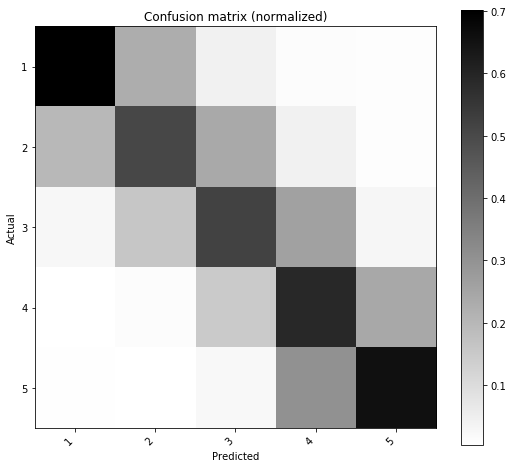

In [34]:
lstm.confusion_matrix.plot(normalized=True)

In [150]:
lstm.prfs

,fscore,precision,recall,support
0,0.722475,0.744369,0.701833,29242
1,0.529447,0.554049,0.506938,29331
2,0.524410,0.530104,0.518837,29171
3,0.532184,0.486014,0.588047,29399
4,0.674163,0.690921,0.658198,29286


In [152]:
lstm.prfs_weighted

AttributeError: 'YelpLSTM' object has no attribute 'prfs_weighted'

In [154]:
lstm.corr_coeff

AttributeError: 'YelpLSTM' object has no attribute 'corr_coeff'

In [158]:
current_example = 916765
rand_tag_num = current_example
print(rand_tag_num)

print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

916765
Diabetics:  Beware.  Stay away.  Buy some for me and don't eat any!  ;)

OMG, soo good, probably the best butter tarts that I've had AND I'm not even a sweets person!  Definitely sweet though.  Wash down with unsweetened coffee/tea.

About $2.50-3ea.  2 tarts were like $6 'n change.  

I sorta 'forgot' about the tarts (Plain, Pecan) for a coupla days after SoupFest - long story - but when I ate them, they tasted fresh still.  An indication of the amount of sugar perhaps?  

Pastry tasted like a butter cookie.  Will never buy that grocery store crap again as it can't even compare!  Mmm...drool... 

Tip:  A few spots around back of the building, in front of skatepark.
Actual stars:  5
Predicted stars:  1


In [159]:
current_example = 865234
rand_tag_num = current_example
print(rand_tag_num)

print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

865234
For anyone trying to compare this buffet to one that is double or triple the price, don't. Just get out your fat wallet and move over the strip. For others of us who want decent value with good, everyday food, this is the place. I'm not overly picky and I like non complicated food that I can identify with, I guess you'd call it comfort food. I've been to all those expensive buffets and I still say for the value Palace Station wins.
Actual stars:  5
Predicted stars:  2


In [160]:
current_example = 757343
rand_tag_num = current_example
print(rand_tag_num)

print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

757343
I had been to this plaza 100s of times in my life and never noticed this gem of a dive bar & grill. Good service, food & prices. The Mediterranean Dip is crazy delicious. I wish it was socially acceptable to order it and just eat it with a spoon!
Actual stars:  3
Predicted stars:  5


In [161]:
current_example = 392282
rand_tag_num = current_example
print(rand_tag_num)

print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

392282
I can't believe all the negative reviews. I've been eating at Bubbas' for years and the food is always top notch. Best Eastern, NC bbq in Charlotte. Get the large plate and include the Brunswick stew. Sweet tea is strong and tasty,
Actual stars:  4
Predicted stars:  5


In [45]:
# reviews_df = pd.read_json("../../full_dataset/restaurant_reviews_final.json", lines=True)

In [81]:
# len_df = len(reviews_df["text"])
# print("len_df", len_df)
# predict_array = np.empty([len_df])
# print("shape of predict_array:", len(predict_array))

# i = 0

# # num_to_process = len_df
# num_to_process = 10000


# while i < num_to_process:
#     predict_array[i] = lstm.make_prediction(reviews_df["text"][i])
#     i = i + 1

len_df 1873619
shape of predict_array: 1873619


KeyboardInterrupt: 

In [60]:
print(reviews_df["text"][511248])
print("Actual stars: ", reviews_df["stars"][511248])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][511248]))

I visited with my family and ordered a few appetizers and a medium size sushi platter.
Their food tasted great. Tempura had the right amount of batter and tasted great. The beef tataki was smaller than I had liked though, considering the price. The sushi platter was great because it had little bit of everything. Salmon, tuna, and eel sushi all tasted fresh and good. There were a few that I could not name but they were still amazing. Rolls were also soft and had a generous amount of ingredients in them. The sea urchin roe sushi tasted especially great. I definitely think that we got our money's worth.
The only issue I had was that the servers told us on two occasions that they would give us the ice cream at the end of the meal. We felt that they were encouraging us to finish the meal. I did not expect this since we were eating for only about an hour. We were a group of 3 and spent about $130 including the tip. It must have been a busy night for them.
The food was great and we enjoyed ou

In [62]:
print(reviews_df["text"][811248])
print("Actual stars: ", reviews_df["stars"][811248])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][811248]))

There so many falafel plate places in this town, I decided to try this one since it has good reviews. I have no clue why. I am so unimpressed. 
I ordered the falafel plate with taboulleh, baba ghanouj, and rice and salad. Nothing tasted authentic, the rice was a bit lumpy and not fresh tasting. The falafel's were probably the best thing in this combo, and they were mediocre at best. Taboulleh was a bit soggy and nowhere near lemony enough. Baba G was not smoky, just bland. I'm pretty disappointed, although I do think for something so simple... I have eaten at so many places that screw this meal up. Add this to that list.
The prices are reasonable,and the service is decent. But the food certainly doesn't warrant any reason to return. 
Cest la vie, Parsley...
Actual stars:  2
Predicted stars:  3


In [68]:
print(reviews_df["text"][911249])
print("Actual stars: ", reviews_df["stars"][911249])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][911249]))

Never disappoint ! Fast ! Good ! And even their pasta doesn't suck so bad( delivery pastas usually are t the best) 
Poutine is awesome and souvlaki comes with a super fresh green salad every time !
Actual stars:  4
Predicted stars:  5


In [83]:
import random

rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)



print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

439475
Came here for lunch.  I had the lunch combo with salad, drink and lasagna.  The salad was good (strawberries spinach balsamic walnuts).  The lasagna was mostly cheese and sauce.  It wasn't really lasagna.  They have a lot of gluten free options if you have allergies.  My group enjoyed their meals (curry pastas)  and desserts.  I missed out on dessert.
Actual stars:  3
Predicted stars:  3


In [84]:
import random

rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)



print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

891472
I love stopping by this place, even if I get just one thing. The brûlée burger is my drug of choice here, it's so damn good. The bacon and onion with burnt sugar really adds a great and unique flavor to the burger, definitely my favorite part.
Actual stars:  5
Predicted stars:  5


In [85]:
import random

rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)



print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

361558
All dishes taste same. Owner is a bit rude. We went from Etobicoke to this place which is quite far just for Undhiyu but he reacted a bit rude. I know it was my mistake I should have called him before going there as he said we have to inform him first and place the order over the phone but since last few days I was having cravings for Undhiyu. He could have been replied in a better way rather than being rude.

Plus these people are really really slow!!
Actual stars:  1
Predicted stars:  2


In [86]:
import random

rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)



print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

717914
I got citrus chipotle and hot garlic flavor wings. Honestly, they were ok. I couldn't tell which was which! If you told me to guess the flavor, one would be sweet chili and the other would be just generic "hot". 

I came to the conclusion that they either messed up my order (which is bad) or they just made up fancy names to get people to buy their wings, but didn't actually put any effort into making their sauces (which is bad). The main thing they have going for is that they serve wings, and even bad wings are good.
Actual stars:  3
Predicted stars:  3


In [87]:
rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)

print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

509058
Since Rio was my home away from home [for the weekend] I decided that it wouldn't hurt to see what VooDoo Nightclub had to offer.

Located 51 stories up from the infamous Rio Las Vegas Hotel, there is an indoor and outdoor [rooftop] nightclub area to drink and dance the night away. 

Since it was warm out, my girls and I decided to hang outdoors to enjoy the cool breeze and take in the lights & breathtaking views. 
As you enter the rooftop, you are greeted with a full bar and a dj located on the opposite end. There are VIP bottle service amenities available and comes equipped with cozy booth seating. 

Drinks are overpriced but what do you honestly expect when you're in Vegas & having some fun at the club. The dance floor is wherever you are currently standing and although I didn't pay too much attention to the music, I do recall them playing a little bit of everything from edm to 90s hip hop.

Overall: 2 Stars because this place is NOT poppin but the views are stunning [+1 star

In [88]:
rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)

print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

370545
How did I forget to write a review! I guess maybe it's because I was too busy stuffing my face! We came here for dinner as part of a bachelorette trip for a fancy dinner. And fancy dinner it was. We had a decent sized group and were sat towards the back, which was perfect. The waiter was friendly and attentive.
Now for the food (from what I remember):
Sangria- Pretty good, hard to mess up
Chicken croquettes- the most favorite amongst the table
Paella- really good. did not skim on the meats, great flavors
Spanish tortilla- nothing special, skip it 
there was one dish that had some sort of potato puree and it was crazy spicy. 
I know I am totally missing stuff, but these are the memorable dishes.
Actual stars:  4
Predicted stars:  4


In [89]:
rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)

print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

621614
Great place... period.   As a dedicated North Sider, this place brings me back to the original James Street Tavern, only better.  The food is good and sometimes very good.  The menu is pub style and I have tried nearly everything on the menu at this point with little disappointment.   The key takeaways if you are considering:

Food:  Good food, but not exotic.  It says gastropub but not by NYC standards but who cares.  Appetizer menu is limited and a few more healthy choices would help.  I do love the fried oysters though, for me perfect every time.  Some friends have found them spotty.  Burgers are tasty, I like them all.   Food gets a 3.5 stars

Drink:  Great bartenders generally speaking and drinks are relatively fairly priced.  Drafts are solid, nothing earth shattering but it is not a craft beer haven.  Mixed drinks solid, again nothing exotic but always a good and fair pour.  Drink gets 4 stars

Atmosphere:  What can you say, it's the James Street.   Jazz oozes out of the 

In [91]:
import random

rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)



print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

854574
Un restaurant où je peux prendre absolument n'importe quoi sur la carte? Ya-hooo! 

En tant que personne coeliaque, j'étais plus qu'emballée d'aller essayer le Zéro8. Le resto est chaleureux, le décor est simple et on s'y sent bien. Mon highlight : le personnel, qui était vraiment sympathique. On prend le temps de nous parler de l'histoire du resto et du menu. En parlant de menu, il y en a pour tous les goûts : soupes, salades, viandes, burgers! Tout a l'air délicieux... et l'est! Et même si c'est un endroit qui se spécialise dans le "sans allergènes", on ne sent pas qu'il n'y a pas de gluten, pas de lactose, pas d'oeufs ou autre. Mon copain n'a pas d'allergies et a quand même grandement apprécié ses plats. 

J'ai hâte d'y retourner pour essayer davantage de trucs! Miam!
Actual stars:  5
Predicted stars:  4


In [92]:
import random

rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)



print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

822769
Love this place!
The food quality seems to be very nice. 
Their shrimp is amazing! There is almost never any waiting time to get fresh food, once something runs out, they fill it up almost instantaneously, which is very important for a good buffet experience!
Very large variety of foods, and drinks! 
Highly recommended!
Actual stars:  5
Predicted stars:  5


In [93]:
import random

rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)



print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

483066
I ordered the filet and scallops.  My girlfriend ordered the shrimp and chicken.  We split an appetizer of jalapeno yellowtail.  I had a Yuengling and she had a glass of red wine.

The jalapeno yellowtail was good.  I was hoping for a little more jalapeno.  4/5

The filet and scallops were both cooked perfectly.  The filet was around 5-6oz and was a great cut of beef.  It came from the kitchen trimmed perfectly.  5/5

The chicken and shrimp were average.  Both the chicken and the shrimp were slightly overcooked.  3/5

The portions are *amazingly* large.  Everyone at our station took a box of food home.  Each dinner entree comes with a few shrimp, fried rice, fried noodles and vegetables.  I recommend this location and we will be visiting again in the future.  Our total bill was around $75+ tip.
Actual stars:  4
Predicted stars:  4


In [94]:
import random

rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)



print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

970912
I took friends here that were visiting from out of state who love  to golf on Oct 10th 2014. We went to rent out two golfing stations and there was some type of glitch in the computer system. We had a rock star in training who was waiting on us and was having some issue with the computer. We were patiently waiting for at least 20 minutes to have the issue solved. I am not sure what happened however the manager Cory came over fixed the problem and comped both stations for free for the inconvenience. Now that's what I call great customer service. Thanks Top Golf, I will definitely be back.
Actual stars:  5
Predicted stars:  4


In [95]:
import random

rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)



print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

210655
We had lunch here last Sunday with our X New Yorker meetup couples. We wee excited to try this new dining in the dark experience! So your choices are Savory, Spicy or Sweet on the menu - you choose a flavor only. Btw this is a vegetarian menu and only cold drinks. It was very cool being led into total darkness to our table. The first course was two shot glasses of let's say soup to get your taste buds ready. The second course was salad and I had the sweet one. The third course was vegetables and falafels, very tasty but not too sweet! The fourth course was dessert & we all had the same dessert - it was yummy!  That's when I asked for coffee but so far they are not serving hot beverages. After dessert, was all got a really nice surprise! Our server Willy was wonderful! We had a lot of fun & I was full! The price for this 4 course meal in the dark was about $98. Per couple.
Actual stars:  4
Predicted stars:  4


In [96]:
import random

rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)



print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

881588
Tis ok..reasonable food. Quality is decent
Actual stars:  3
Predicted stars:  3


In [97]:
import random

rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)



print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

795482
The sides are the greatest part of Dickey's. The fried okra is perfection, the baked potato is HUGE and comes with an array of delicious toppings, including the bbq meats, but best of all is the dill potato salad. It has no onions!! Up until this point in my life the only potato salad I have ever encountered without onions are the ones I make myself. The poor kid behind the counter somehow felt the need to apologize that it was dill flavored, clearly not understanding that dill potato salad is the ultimate unicorn of flavors, unheard of in the world at large. I could live on it and it alone. If not for that whole dying of diabetes or malnourishment thing. The jalapeno beans have some actual heat to them and the free ice cream is nice in the heat of a Vegas summer, but I am all about the potato salad.
Actual stars:  5
Predicted stars:  4


In [98]:
import random

rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)



print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

866587
This has to be my favorite teppan yaki spot in Vegas! Every time I come here, service is always on point and food is always delicious! 

The last time I came here, the group I came with did the happy hour special. Definitely a must-try late night food place!

I did the seafood combo that comes with miso soup, fried rice, shrimp, scallops and fish! It also comes with many different sauces made to order from the chef all for only $20! (Happy hour special) Because I went with a big group of early to mid 20's age, the teppan yaki chef made funny after-hour remarks! The chef was so funny and very accommodating. 

I went here for my mom's birthday as well a few months ago and I went with my family. The chef was so nice and funny.. he was not going to do some "adult" jokes. Instead, he cooked the fried rice in a heart-shaped form and was trying to make my grandma laugh! My family enjoyed it and they loved the food!

I love this off-the-strip spot! A local hot spot, a tourist favorite, 

In [99]:
import random

rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)



print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

86477
Excellent food, great prices, good atmosphere. I come here all the time! While the service is not the most attentive (given it is a Chinese restaurant, that is not too surprising and I don't really expect that), I always come and leave here feeling satisfied -- nothing is too expensive, portions are good, food is tasty. My favourite times to come is between 3-5 because they have their afternoon tea specials or before 11am to get their breakfast special.
Actual stars:  5
Predicted stars:  4


In [100]:
import random

rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)



print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

586310
Sorry Torito - you missed the mark. 

Looked forward to visiting Torito based on Yelp reviews. As others have stated the ambiance is very nice well decorated, with a laid back kind of feel, which is its only saving grace. 

The food - we ordered the specials of the day, cheek and tongue tacos ($16) and the chicken sliders ($12).  

So lets start with the tacos, I would consider myself an "adventurous eater" as I would not generally shy away from eating tongue BUT and its a big BUT, it needs to be 1. cooked well and 2. have some good ol' flavour going on. Fortunately the meat was pretty melt in your mouth, however tasted like... wait for it.... nothing, A BIG OLD NOTHING!! The corn tortillas had more flavour! 

Next chicken sliders!! small bite sized deliciousness in a fresh brioche bun, aioili, haloumi cheese how can you go wrong?? I was imagining 3 beautiful little brioche buns with an glistening egg wash with a wonderfully seasoned chicken patty a piece of grilled haloumi, a w

In [101]:
import random

rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)



print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

548800
The burgers here are delicious and juicy. The poutines are even better! Portion is plenty.

I love to come back when in the area and craving a burger.

Much better deal than the highly rated burgers priest.

They have some tables and seats so you could eat there comfortably so, although many take it to go.

Service was good, a nice family.
Actual stars:  5
Predicted stars:  4


In [102]:
import random

rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)



print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

179057
Great experience and amazing food.

I have been waiting to try this place out for a while now and I'm glad to say that I finally got to experience it today. 

I went out with my friends to enjoy the amazing weather at Town Square and we made a decision to eat here. We were really famished and as we read their menu (which was posted outside) we were sold.

As we walked through the restaurant we noticed the cool alcohol display in the hallway. The restaurant had a modern casual feel. They had a full stocked bar with a list of beers on tap and it was semi-open. My friends and I opted for the outdoor patio and it couldn't be more perfect to enjoy the view and the lovely weather.

Our waitress (I wish I remembered her name. She was super nice and always made sure we were doing well) was very pleasant and made all the right suggestions when it came to ordering our food. I asked her what she'd recommend for an appetizer. She chose the Beef Poutine and it was the bomb.com the chips (fri

In [103]:
import random

rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)



print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

933659
Innovative menu led us to order several small plates, all of which satisfied us.  The French Onion soup was a definite "A", and I've had plenty of it to compare to.  Another at our table had a salad, and he raved about it - a salad!  Surprising!  The pizzas were excellent; the drink menu, great; and the desserts, mighty fine.  The patio is cozy and inviting; we ate inside near the bar and liked the atmosphere.  We shall return!
Actual stars:  4
Predicted stars:  4


In [105]:
import random

rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)



print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

305092
Our server Nanette was great as usual 
.. had small greek with smoked salmon and spaghetti with Italian sausage and mushrooms
Actual stars:  4
Predicted stars:  4


In [106]:
import random

rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)



print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

299867
I am still spoiled by the Five Guys of the past, i.e the east coast VA version of yesterday year. Way back in the day, the burgers used to have more meat and now, unless you get a double, you will be asking "where's the beef?" The fries are still delicious as always and I love that you can still get as many toppings as you want on you burger, but alas, your patties are getting thinner and thinner. :(
Actual stars:  3
Predicted stars:  5


In [107]:
# 392282

import random

rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)



print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

392282
I can't believe all the negative reviews. I've been eating at Bubbas' for years and the food is always top notch. Best Eastern, NC bbq in Charlotte. Get the large plate and include the Brunswick stew. Sweet tea is strong and tasty,
Actual stars:  4
Predicted stars:  5


In [108]:
# 757343

import random

rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)



print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

757343
I had been to this plaza 100s of times in my life and never noticed this gem of a dive bar & grill. Good service, food & prices. The Mediterranean Dip is crazy delicious. I wish it was socially acceptable to order it and just eat it with a spoon!
Actual stars:  3
Predicted stars:  5


In [109]:
import random

rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)



print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

359287
Average food at an above average price. Fast food restaurant, that charges fancy sit down restaurant prices. Menudo had no hominy. Tacos were good...But who doesn't make a good taco? The problem here is the price. At $2.50 a taco they are roughly a $1 more then most places. I personally didn't taste a difference.   The salsa was good, but they give you  the tiniest cups I've ever seen. Basically...Salsa enough for 1 taco. Everything is do it yourself. Won't come back.
Actual stars:  2
Predicted stars:  2


In [110]:
import random

rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)



print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

619777
The food is quite good (chicken, ribs, corn and slaw).  The service was nice but i think the place was slammed with clients all at the same time.  The price is slightly on the high end, but the quality ous much better than other BBQ restaurants.   Will go back perhaps when the weather is warmer so that we can check out the patio.
Actual stars:  3
Predicted stars:  3


In [111]:
import random

rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)



print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

711645
Superb fusion of American and Vietnamese cuisine.  on the table are plates of oxtail fried rice, fried oysters, mekong river soup (made with beef, fishball, shrimp, and pork)... Dungeness crabs and Branzino.  

All entrees are well prepared and are an explosion of taste. Yummy to my tummy.  Can't wait to revisit.
Actual stars:  5
Predicted stars:  5


In [112]:
import random

rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)



print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

213479
My kids absolutely loved this show. I don't think I've ever seen my daughter smile so big in her life. I don't think there's a bad seat in the house here, so don't worry about paying more for better seats. After being seated the waiter takes a drink order right away. Sodas and water come with the meal, cocktails and beer are extra. They start with a tomato soup. No utensils here folks. Really good soup. Then the show starts as dinner comes out. A fresh Cornish game hen, potatoes and broccoli. Everything was really tasty. 

The show runs more than an hour. They really get the crowd involved in the show. Everyone yells and cheers. There a lot of cool lights and pyrotechnics. The jousting battles and hand to hand combat is quite good. The whole show tells a pretty good story with a great grand finale.

I think you're money it spent quite well here. It's about $240 for 4 people for the cheapest seats which includes dinner. I would take my kids again in the future.
Actual stars:  5
P

In [113]:
import random

rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)



print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

753013
I looooove I Love Roti!  Been coming here for many years and always get a fantastic meal.  I'm not as close as I used to be, but any time I'm in the area it's a magnetic attraction.  Recently had the doubles for the first time.... where have you been all of my life??  I only discovered doubles more recently, but these are the best I've ever had.  I usually order beef roti.  The roti bread is soft and freshly made, and filled with deliciously seasoned tender beef and lots of gravy.  Excellent value and lunch-size portions earlier in the day.
Actual stars:  5
Predicted stars:  5


In [114]:
import random

rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)



print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

339797
Oh no... I'm going to be one of the first to give this place a bad review ;o(

Came here at 1pm and wait time was an hour for two people. Even if there was no wait time, I would not come back here. Maybe I didn't order the right thing, but everyone else raved about it on Yelp.

THE BEASTWICH
- Deep fried chicken thigh was 90% soggy with only the edges being crispy. The meat was tender, but not very flavorful. 
- Biscuit is ok. It's light and crispy at the top, but generally lacked the flavor I like in a biscuit (i.e. butter and salt). If you want an awesome biscuit breakfast sandwich, go to Lazy Daisy's Cafe on Gerrard instead).
- Fried egg is key! 
- Pimento Cheese sauce was ok.
- Potatoes were crispy, but tasted like they've been sitting around for awhile... lacked flavor in the inner potato part. If you want good potatoes, go to Insomnia on Bathurst and Bloor.
- Mixed Salad had a nice ginger dressing, which I'm not usually a fan of, but it worked well. 

PORK BELLY SIDE
- Ove

In [115]:
import random

rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)



print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

240168
Had brunch here recently. The portions are huggeeeee. The prices are very reasonable around 10-15$ for most items. The French toast and home fries were very good. My crepes were good too a little heavy though. Service is great except I had to flag down my waiter to ask for an item they forgot but forgivable bc this place here crazy busy. Otherwise all the waitstaff was excellent.
Actual stars:  5
Predicted stars:  4


In [116]:
import random

rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)



print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

248330
We tried this place for the first time and loved it! The kal-bi beef was so delicious and tender! Oh and we had the guava jelly pancakes and they were delectable! The sauce. Was sweet and tangy, but not overpowering at all!
Actual stars:  5
Predicted stars:  4


In [117]:
import random

rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)



print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

275708
The staff are friendly and attentive. The garlic bread (unlimited) was very soft - just wish it was more garlic-y. The chicken tetrazini pizza was so so - didn't love the green onions added to the pizza and I think they were trying to make that recipe less soggy (apparently a number of customers complained About it being soggy) so I didn't really taste any sauce (it was supposed to have alfredo sauce). The bottomless caesar salad had real bacon bits (and a good portion of it) which was nice.
Actual stars:  3
Predicted stars:  3


In [118]:
import random

rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)



print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

899267
Tommy ..you aren't two tone..(for the older and wiser) you aren't even one for that matter. I was actually not going to Yelp your ass. Then I came home, had to sit on my back porch and to recap  your assholedness...ya that's right...ass-hole-ed-ness...This is going to be long folks, so grab a cocktail and hunker down....I promise not to leave out any juicy details...ground)...K ...so my daughter  totally gets dressed in a dress and comes out in the kitchen tonight...I'm like oh yeah! 8 and in a dress, let's go to dinner. We went to The Parlor..no parking...and passed Tommy 's on the way there..mental note..they are NOW open...so went back..she was said, "No Mommy..please Tarbell's"..cuz. she loves Jason there...I said, " They are in the neighborhood..let's just try it out." Ok, Tommy V's...so we walk in and the "Not old enough to lick a postage stamp hostess says to us, "Um, I'm sorry there are only 6 tops available so we can't seat you...or you can sit in the banquet room by yo

In [119]:
import random

rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)



print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

174829
This is the best restaurant in liberty village, with the exception of Mildred's.  The food is head and shoulders above the other establishments in Liberty Village since the Chef is a true seasoned professional specializing in Fine Food and Haute Cuisine. 

And the prices are actually very decent!  T-Bone steak for $22.  Goat-cheese stuffed chicken breast in wild mushroom sauce for $21.  They have lunch specials every day for $10, and the Perronni draft beer is always on special for lunch.  

The ambiance is amazing.  The place used to be a factory, so huge windows with tiled panes, old-world radiators and french-bistro-like tables.  I love the melted candles at the entrance!
Actual stars:  5
Predicted stars:  5


In [120]:
import random

rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)



print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

696260
So I didn't know when I walked in That not only was I paying for cold food but I was also paying for a cheep knock off of Ghetto fight! As I was walking to a place to sit while I was going to consume my cold meal, I witnessed a young woman haul off and punch a man sitting next to her. He was caught texting another girl in front of her (it's not eavesdropping if she is screaming it) she continued to hit him and sling chairs around. The whole time a manager sat eating subway with his wife, even his wife said he should have shut the shit down. While I fished my meal in what I guess you could describe as unique ambiance every car that went through the drive through had to have there food brought out to them. I guess the manager was once again too busy with his sub to bother. Than to top it all of cause really this place can't get any better there was gum all over my seat. I guess the boxing match must have distracted me. And through all this someone was sleeping through everything i

In [121]:
import random

rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)



print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

964538
THE BEST MEXICAN FOOD - for the price! It's delicious and it's fast!! Every time the quesadilla is ridiculously tasty and the queso dip is addictive. They make great guacamole, too.  I usually have the steak tacos - you can't lose, really.  It's the perfect Mexican place for the perfect price.  I'M HUNGRY!!!
Actual stars:  4
Predicted stars:  5


In [122]:
import random

rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)



print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

527887
I love going here. it reminds me a lot of chicago with the decor. i grew up about 30 miles south of chicago. love the pizzas and love the all the choices of beer.
Actual stars:  5
Predicted stars:  5


In [124]:
import random

rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)



print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

500981
Consistently comes to my rescue when I need a place to chill. I wish they were open for dinner. Today is what made me write the review. Went to one place, line was out the door. Went to another- same deal. Went to Einsteins and they were busy but not crazy busy. More like steady. Next time I'll go there first. Love the cranberry tasty turkey on a cranberry bagel. Love their seasonal food too!
Actual stars:  5
Predicted stars:  4


In [125]:
import random

rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)



print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

228455
Happy to give this place another chance! Tried it out for brunch today and they are well on their way back to being what they were. We were greeted not only by the host but also the chef in the butchery...we explained that we had not been in a while but heard there was a new management team so we wanted to come back. They were both grateful. We were quickly sat outside the patio has the best heaters in town...I wasn't cold once. Bottomless
Mimosa for $16 is a great price...I'm not a fan of the Wycliff but add enough orange juice and it's fine. Short rib hash was an A+ but the rest of the breakfast was just good.
Can't wait to go back for dinner and get a steak....that's what this place is about!
Actual stars:  3
Predicted stars:  4


In [126]:
import random

rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)



print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

456338
I'd been to a famous one of these before (kushi-age restaurant) in Kyoto so I was excited to see something like this in Las Vegas.  We were able to make reservations quite easily (also wasn't busy when we went).

Hubby, though a big fan of fried foods, was afraid a meal of it would really gross us out with the greasiness.  Thankfully, Yu-Yu had plenty of other things to distract our taste buds in between fried morsels.

Definitely recommend the following:
Yellowtail Carpaccio
Seared Beef Tongue
Garlic Chicken Gizzards
Skewers: Mentaiko Mochi, Mozarella Chicken, Pork Tenderloin, Bacon Okra

We also ordered the Tuna Yukke, House salad and the pork soup but these were normal.  We also got bacon mochi but the bacon was so thin, I thought they didn't even include it.  Skip!

They do have a comprehensive menu of sauces and I found myself drawn mostly to the salts they start with and their ponzu.  Yum!

Service was jovial though it got a little defensive about the bacon mochi and kind 

In [127]:
import random

rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)



print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

959087
I've grown to like Switch more and more.  Conveniently located right off the light rail (Central and Virginia), it makes a good spot for a weekend dinner or brunch.

I've never been let down by the food at Switch... standouts include the baked crab and lobster appetizer and the apricot-BBQ-feta chicken sandwich.

I lament about the drinks.  Maybe I've not ordered the right thing, but the few times I've had their drink specials, I can't help but notice they are pre-made and unfortunately taste accordingly.  

Service is spot on 4 out of 5 visits and I like the atmosphere, so I'll be back again and again.
Actual stars:  3
Predicted stars:  4


In [128]:
import random

rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)



print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

296008
I like this place. It has a good feel and delicious margaritas. If I were back in Old Town, I might stop by. But I am sure every neighborhood has their own margarita spot that is quite similar. There is no reason to drive for miles to get here.
Actual stars:  3
Predicted stars:  4


In [129]:
import random

rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)



print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

184965
What a crappy menu.  They don't tell you how many wings and how many sauces you get with each size of order.  Took us forever and pissing off the waitress to figure out our order.  The snack size of the boneless wings has 8 wings and you can choose 2 sauces, the snack size of the bone-in wings has six wings and one sauce. They act like you should just know how it works.  Also,  traditional wings are more restrictive and more expensive than boneless, which in my experience is backwards.  It is also insanely loud in the place.  On top of it they charge almost $5 for the weakest, wilted little side salad.  Also, they bring 10 wings in a small order, plus carrots and celery, with an Itty bitty 2 oz. Of ranch.  Then they want $0.60 for each 2 oz. Thereafter.  They can keep it!  $38 for two for wings and mediocre fries.  $45 after tip.  Ugh...
Actual stars:  2
Predicted stars:  2


In [130]:
import random

rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)



print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

395578
A friend of mine had some clients in town who wanted to see a new show on the strip.  There have been some really great buzz going around town about this show and so I wanted to check it out.  Plus, it's in the Cosmo, so DUH!

Once you enter the Cosmopolitan from valet, the entrance is right up the first escalators.  After giving the security guards your ticket, you're taken in the first room: a hostess station room.  You'll notice lots of different doors.  Omg, I felt like I was in an episode of Alice in Wonderland.  We showed our tickets and was whisked away to the bar area up the stairs.  The layout was pretty rad.  Two bars on either side of the room.  There was a section with oversize chairs in a half moon stadium seating layout. The middle was a revolving stage and some trapdoor staging.  We were in for a great treat! 

At the bar, I decided to get the Moscow Mule for around $10.  Such a cool thing, it was on tap!  The flavor was great! I must say it was probably the best 

In [131]:
import random

rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)



print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

49164
When there is a special occasion in my family, the only place we trust with baking our cake is Jean Philippe Patisserie, because special occasions call for special cakes and Chef Claude and his team ALWAYS deliver. This year we ordered from the Aria location. We had a princess party and needed a cake fit for royalty. I showed Chef Claude a picture and he and his team made magic happen. This cake was LEGENDARY. Everything was edible, the towers were made of delicious CHOCOLATE. The pretty pink fondant was shimmery and yummy. We ordered vanilla cake with creme brulee custard and strawberries. The cake was moist and delicious, the creme brulee custard was extraordinary! There were beautiful intricate details added that truly showcase the team's artistry, the picture doesn't do it justice. The cake is the centerpiece of a party and this cake took our party to the next level. Another unforgettable cake. Thank you Chef Claude!  LET THEM EAT CAKE!
Actual stars:  5
Predicted stars:  5


In [132]:
import random

rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)



print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

929319
First thing to know about Melt is there is almost ALWAYS a wait. I went with two friends on a Saturday at 4:00PM and the wait was 30-40 minutes. My friends said they have arrived when it opens at 11:00AM and there is still a line waiting to get in. So, if you are in a hurry, go elsewhere. And, obviously, the smaller the group the easier to be seated. Tables are basically 4-square so larger groups can have a few pulled together. But waiting for some to open up near each other might take a while.

Next, the staff is very friendly. While standing at the hostess desk they saw I was wearing a "Praise Cheeses" T-shirt that they loved (I mean, their name IS Melt.). When seated, one of them even came by and leaned in to the waiter to say "Check out his shirt!" The waiter took the time to explain, as it was my first visit there, that I could have virtually anything I wanted and they would prepare it anyway I wanted.

The sandwiches are massive. I ordered their burger, a half pound of fre

In [133]:
import random

rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)



print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

715643
Honestly, the biggest standout to me about this restaurant was how noisy it was. It's very cozy, but also hard to hear anyone at your table. I wasn't expecting this.

The food was very good and/but definitely on the heavy side - maybe this was partially due to our ordering, but we also found the portions to be very large. The pork risotto was so rich that we would have been happy to have shared a quarter of it, even without the foie gras, which felt over the top to me.

But I really enjoyed the boar, which was sizable but NOT over the top. We asked for a wine pairing to encompass people who ordered boar as well as those who got fish, and were given a suitably subtle red, which was decent but not exciting. The desserts were more exciting, but overall we just weren't blown away.
Actual stars:  3
Predicted stars:  3


In [134]:
import random

rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)



print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

551161
$1.75 margaritas, all day, every day.

 

What else is there to say?

 

OK, I have a few more things to say. I started coming here about a year and a half ago because it's a hop, skip and jump from my office and was the go-to Mexi restaurant for special lunches and happy hours.

For its decent food and SUPER-fast and friendly service, you can't beat it. It will satisfy that Mexican food craving but 'tis true it is nothing to write home about. (I imagine if I were from the East Coast or like Idaho or something, I really would write my friends and family regularly to brag about the amazing Mexican food in AZ, just sayin'.)

Cases in point of "super-fast-and-friendly-service": 1)Came here for drinks and apps with a friend and were about to settle our tab and head out the door anyway when our server kindly asked if we would mind moving tables to accommodate a large party - and we would be given margaritas on the house for the "trouble." 2) Myself and two other friends dropped in fo

In [135]:
import random

rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)



print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

333505
What can I say? Jean Philippe Patisserie located at the Aria is my favorite go to place to satisfy my sweet cravings! Whether you're craving something cold like ice cream or sorbets, something sweet, like chocolates, desserts, a pastry, coffee or a mocha, this is a really cool, hip, happening place to hang out! Everything here is just "Yummy!!!".  Jean Philippe Patisserie is located in the heart of Aria right off the casino floor. It's a cool place to just hang out with friends for fellowship or even people watch LOL. No time to have a seat and relax? Jean Philippe is also perfect for grab and go! Sometimes when I am on the run, I like to just walk through to satisfy my "eye candy" hahaha.

There are ample parking at the Aria parking garage. (Please note if you are parking, the MGM Resorts have started to charge for parking, unless you are staying at one the the MGM Hotels)

Be sure to check out Jean Philippe Patisserie the next time you're in Vegas! Trust me it's that good!! :)

In [136]:
import random

rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)



print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

718784
When one thinks of Huntersville, NC it does not exactly feel as the abode of an authentic family owned Italian restaurant serving up one of the best tasting marinara ever! This place is super busy on weekends and since they don't take reservations it is always hard to go here in large groups. However, the staff is super friendly and will happily serve up beers and wine with a fun filled conversation in the lobby while you wait. The wait is worth it. The Mozzarella in Carrozza comes drenched in their all so yummy marinara. This is a dreamy concoction that can be best described as just loads of flavor in each bite where the fresh mozzarella blends with the crunchy texture of the bread and the tangy marinara that has the natural sweetness of vine ripened tomatoes. You will want to get that plate clean with the fresh bread they have at the table which is a nice good hearty crusted loaf with a tender white inside. My personal favorite is the Pollo Parmigiana with substituting the ang

In [137]:
import random

rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)



print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

257678
No, just no. I'm upset and feeling all things not great about this new place. Location is fine and patio is great as always but that is where it ends. The food is meh and why did you change the menu? If business is going well and people love you, why change it?! Change is definitely not always good. I thought you were just upgrading location. That new menu of yours is terrible, there's barely anything on it worth ordering. We ordered the happy hour nachos, there was a puddle of water at the bottom of the plate, maybe from watery salsa? who knows but it was weird and they only tasted okay. How can it be that your only quesadilla on the menu is veggie? Why are your tacos made in child size and cost $3 each? Why, why why oh why ever change?!

Please, do us all a favor and have re-re-opening party with the old menu back and celebrating all of the good old cheap awesome Mexican food and margaritas that we all loved. I used to go here at least every other week if not more for happy ho

In [138]:
import random

rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)



print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

90909
Slow service Inside or drive-through. Super busy here. Locals seem to love it - especially busy if the weather outside is sunny and nice.

Generally appears unclean. Bathrooms are usually disgusting. Not cleaned enough or the customers are gross.

WiFi for Internet rarely works. Usually unable to connect.
Actual stars:  1
Predicted stars:  2


In [139]:
#865234


import random

rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)



print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

865234
For anyone trying to compare this buffet to one that is double or triple the price, don't. Just get out your fat wallet and move over the strip. For others of us who want decent value with good, everyday food, this is the place. I'm not overly picky and I like non complicated food that I can identify with, I guess you'd call it comfort food. I've been to all those expensive buffets and I still say for the value Palace Station wins.
Actual stars:  5
Predicted stars:  2


In [140]:
#865234


import random

rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)



print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

950172
I loved this place.  Great place to be. It just feels like living hanging here.  It's almost better than being in Hawaii.  Everyone was very nice. Not just the bartender who  gave us great service but also the host and who ever ran our food out while it was hot and fresh.
Actual stars:  5
Predicted stars:  4


In [141]:
#865234


import random

rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)



print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

312307
This really is good Carolina BBQ. Even good or Sweet Tea.
Actual stars:  4
Predicted stars:  4


In [142]:
#865234


import random

rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)



print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

582810
The place is small, great food and service I've had the Pilgrim and salad  and home made dressing was great! I want the recipe. 

The service is always good and the drinks as well.

The Mesa location  we sat on the patio and it's bigger inside was a little loud.
Actual stars:  4
Predicted stars:  4


In [143]:
#865234


import random

rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)



print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

470914
I ordered three banh mi, different flavors, asked for no jalapeno on any.  To go, so I didn't really open the bag before I left the premises.  Got home, all 3 had jalapeno.  BBQ Pork banh mi had a decent amount of meat, good flavor, and I'd say was the best of the three.  The grilled chicken & grilled steak ones had minimal amount of meat.  All three were very skimpy on the pickled vegetables, which is one of the distinctive flavors I like about banh mi.  They did use a good glop of mayo on all three sandwiches, which I am not really used to, but not super opposed to.  I'd give them another try, but not on any of the banh mi.  I hope their pho is better...
Actual stars:  3
Predicted stars:  3


In [144]:
#865234


import random

rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)



print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

580460
The burgers are delicious and made using ethically-raised meat. There are loads of toppings to choose from and you really can't go wrong with New York Fries. Yes, it can be pricey. Yes, waiting for your order can take a couple of minutes longer than other places. But considering the rest of what I just mentioned, to me it's very worth it.
Actual stars:  4
Predicted stars:  4


In [145]:
#865234


import random

rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)



print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

922993
In town for an event with customer.  Afterwards, I was craving for some boba tea.  Unfortunately, most are closed @ 9p or maybe 930p.  This is one of few that are open until 10p when we got there around 945p.

Got the taro milk tea with boba.  First thing I noticed is that they uses a plastic lid, and not the sealed wrapped top that most other boba are known for.  Traditionally, if the top is sealed, you can then give it a good shake to make sure the boba is loosen and everything is well mixed.

OK, it's purple, and has taro flavor.  Perhaps there was too much ice, but it tasted a bit watered down for a drink over $5.  The boba seemed to be about right in terms of it's chewiness, but just didn't have enough taro flavor overall.

Now, this review is only on the 1 time I've had the boba drink.  Perhaps their shaved ice is better, but for now, this is just a mediocre place.  By the way, when I used the credit card, it automatically added more than 15% tip, which I had to manually a

In [146]:
#865234


import random

rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)



print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

60864
We want for brunch and did not like the food. The restaurant itself is a neat idea but the kitchen needs to go back to the drawing board. Some of the dishes were not well paired in ingredients.
Actual stars:  2
Predicted stars:  2


916765
Diabetics:  Beware.  Stay away.  Buy some for me and don't eat any!  ;)

OMG, soo good, probably the best butter tarts that I've had AND I'm not even a sweets person!  Definitely sweet though.  Wash down with unsweetened coffee/tea.

About $2.50-3ea.  2 tarts were like $6 'n change.  

I sorta 'forgot' about the tarts (Plain, Pecan) for a coupla days after SoupFest - long story - but when I ate them, they tasted fresh still.  An indication of the amount of sugar perhaps?  

Pastry tasted like a butter cookie.  Will never buy that grocery store crap again as it can't even compare!  Mmm...drool... 

Tip:  A few spots around back of the building, in front of skatepark.
Actual stars:  5
Predicted stars:  1


In [148]:
rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)



print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

929998
This place is always packed - try and make reservations if you're coming with a large party.
Food is always decent and staff is always friendly. They try and be creative with their menu and change it up here and there which is great because it keeps things fun.
Great patio as well to people watch.
Actual stars:  3
Predicted stars:  4
